# Assignment B5
Problem Statement: Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. <br>
Determine the number of clusters using the elbow method.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [56]:
df = df[['QUANTITYORDERED','PRICEEACH','SALES','MSRP']]

In [57]:
df.head()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
0,30,95.70,2871.00,95
1,34,81.35,2765.90,95
2,41,94.74,3884.34,95
3,45,83.26,3746.70,95
4,49,100.00,5205.27,95


## K-Means with WCSS and Elbow Method

In [58]:
from sklearn.cluster import KMeans

In [59]:
wcss = []

for i in range(1,11):
    clustering = KMeans(n_clusters=i, n_init=10, random_state=42)
    clustering.fit(df)
    
    wcss.append(clustering.inertia_)

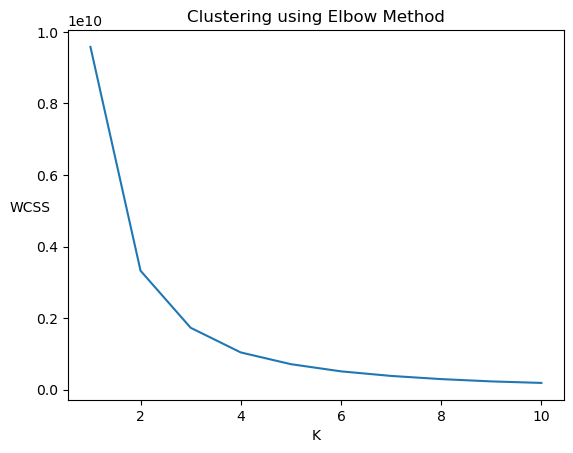

In [60]:
plt.plot(range(1,11),wcss)
plt.title('Clustering using Elbow Method')
plt.xlabel('K')
plt.ylabel('WCSS',rotation=0)
plt.show()

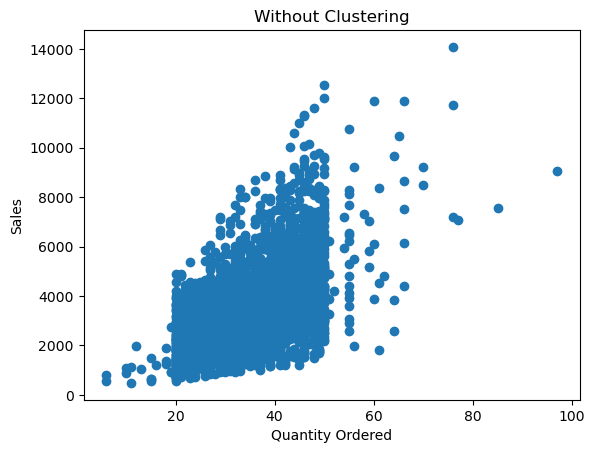

In [72]:
plt.scatter(df['QUANTITYORDERED'], df['SALES'])
plt.title('Without Clustering')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

In [73]:
optimal_k = 3
model = KMeans(n_clusters=optimal_k, n_init=10, random_state=43)
clusters = model.fit_predict(df)

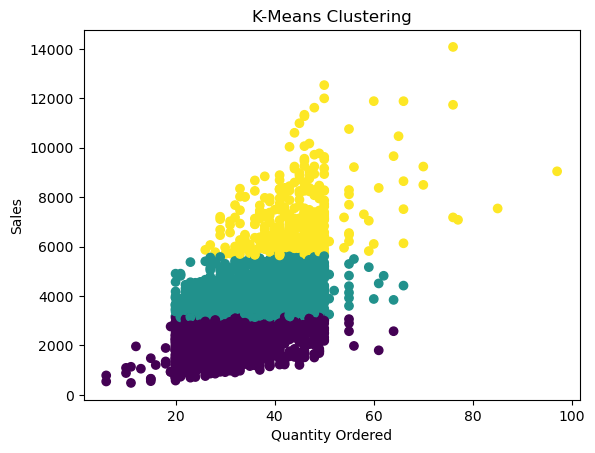

In [74]:
plt.scatter(df['QUANTITYORDERED'], df['SALES'], c=clusters)
plt.title('K-Means Clustering')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()